In [13]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import imutils
import random
import os

In [ ]:
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")


In [ ]:
dataset = '/content/zfaces'
dataset_dirs = ['/content/zfaces', '/content/faces2']
features = []
labels = []

for i, dataset in enumerate(dataset_dirs):
  for root, dirs, _ in os.walk(dataset):
    category = root.split("/")[-1]
    print(category)

zfaces
faces2


In [ ]:
dataset_dirs = ['/content/zfaces', '/content/faces2']
features = []
labels = []

for i, dataset in enumerate(dataset_dirs):
  for root, dirs, _ in os.walk(dataset):
    category = root.split("/")[-1]
    for img_name in os.listdir(root):
        img = cv2.imread(os.path.join(root, img_name))

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces using Haar cascade
        faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Crop and resize the face region
            # Extract the face region
            cropped_face = gray_img[y:y+h, x:x+w]

            # Resize the face region
            resized_face = cv2.resize(cropped_face, (96, 96))

            features.append(resized_face.flatten())
            labels.append(category)

features = np.array(features)
labels = np.array(labels)

In [ ]:
features

array([[180, 146, 107, ...,  33,  33,  41],
       [ 27,  33,  33, ...,  20,  27,  39],
       [  6,   6,   7, ...,  72,  71,  70],
       ...,
       [ 73,  78,  98, ...,  40,  46,  38],
       [  1,   2,   1, ..., 128, 146, 146],
       [211, 209, 212, ..., 131, 120, 128]], dtype=uint8)

In [ ]:
labels

array(['zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces',
       'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces',
       'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces',
       'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces',
       'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces',
       'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces',
       'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'faces2',
       'faces2', 'faces2', 'faces2', 'faces2', 'faces2', 'faces2',
       'faces2', 'faces2', 'faces2', 'faces2', 'faces2', 'faces2',
       'faces2', 'faces2', 'faces2', 'faces2', 'faces2', 'faces2',
       'faces2', 'faces2', 'faces2', 'faces2', 'faces2', 'faces2',
       'faces2', 'faces2', 'faces2', 'faces2', 'faces2', 'faces2',
       'faces2'], dtype='<U6')

In [ ]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
  iaa.Flipud(0.5),
  iaa.Affine(rotate=(10,-10)),
  iaa.Affine(scale=(0.9, 1.1))
])

In [ ]:
# # Create image augmentation pipeline
# seq = iaa.Sequential([
#     iaa.Fliplr(0.5),
#     iaa.Flipud(0.5),
#     iaa.Affine(rotate=(-10, 10), shear=(-10, 10), scale=(0.9, 1.1)),
#     iaa.Multiply((0.9, 1.1), per_channel=0.5),
# ])

In [ ]:
aug_data = []
aug_labels = []
for i in range(len(features)):
    img = features[i].reshape(96, 96)
    img = seq(images=img)
    img = img.reshape(-1)
    aug_data.append(img)
    aug_labels.append(labels[i])


In [2]:
import matplotlib.pyplot as plt

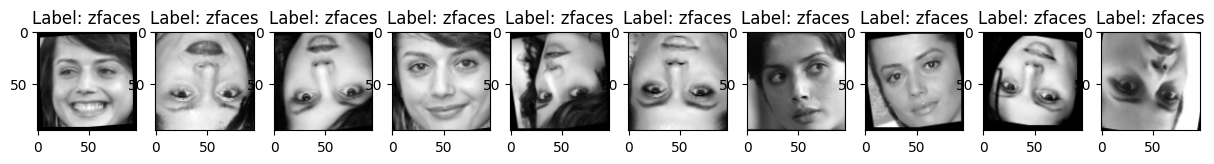

In [ ]:
# Define number of images to display
n = 10

# Plot augmented images
plt.figure(figsize=(15, 3))
for i in range(n):
    plt.subplot(1, n, i + 1)
    img = aug_data[i].reshape(96, 96)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {labels[i]}")
plt.show()

In [ ]:
# Add augmented data to original dataset
features = np.concatenate((features, np.array(aug_data)), axis=0)
labels = np.concatenate((labels, np.array(aug_labels)), axis=0)

In [ ]:
x_train, x_test , y_train, y_test =  train_test_split(features, labels, test_size = 0.2, random_state=42)

In [ ]:
params={
    'C':[0.1,1,10,100], #hyperparamater to control error lower the C higher the sense of overfitting
    'gamma':[1,0.1,0.01,0.01], # Only required for RBF. For linear only C is enough. Gamma defines curvatures
    'kernel':['rbf','linear']

}

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
gridsearch=GridSearchCV(
    SVC(),
    params,
    verbose=3, #Progress bar showing
    cv=20, #cross validation
    n_jobs=-2, #cores to assign
)

In [ ]:
model=gridsearch.fit(x_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits
[CV 1/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 2/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 3/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 4/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 5/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 6/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 7/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 8/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 9/20] END .......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 10/20] END ......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 11/20] END ......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 12/20] END ......C=0.1, gamma=1, kernel=rb

In [ ]:
model.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
print("Best parameters:", model.best_params_)
print("Best score:", model.best_score_)

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best score: 0.9316666666666666


In [14]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8333333333333334


In [ ]:
classes = ['zfaces', 'faces2']

In [ ]:
y_pred

array(['faces2', 'zfaces', 'zfaces', 'zfaces', 'faces2', 'faces2',
       'zfaces', 'zfaces', 'faces2', 'zfaces', 'zfaces', 'faces2',
       'faces2', 'zfaces', 'zfaces', 'zfaces', 'faces2', 'faces2',
       'zfaces', 'zfaces', 'zfaces', 'faces2', 'zfaces', 'faces2',
       'zfaces', 'zfaces', 'zfaces', 'zfaces', 'zfaces', 'faces2'],
      dtype='<U6')

In [ ]:
x_test

array([[246, 247, 248, ..., 224, 229, 225],
       [  4,   4,   9, ...,  90,  85,  80],
       [ 70,  67,  50, ...,  64,  72,  53],
       ...,
       [ 31,  44,  50, ...,  30,  21,  19],
       [  0,   2,   2, ..., 251, 202,  13],
       [ 60,  41,  46, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
y_test[0]

'faces2'

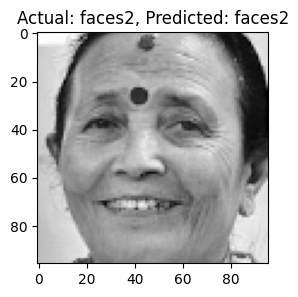

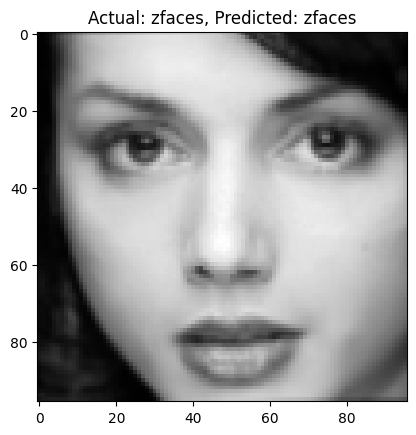

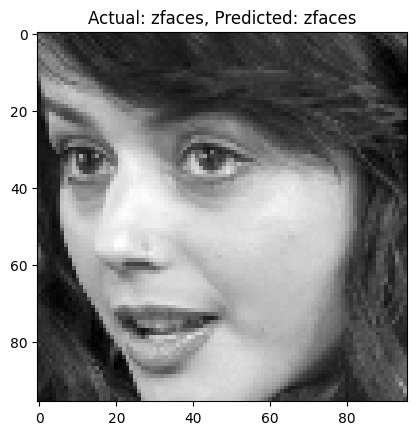

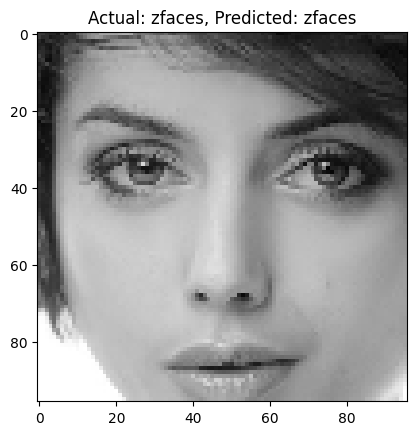

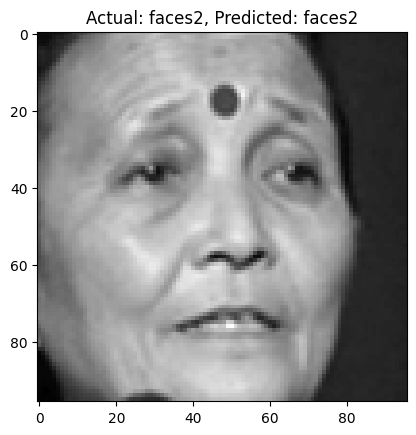

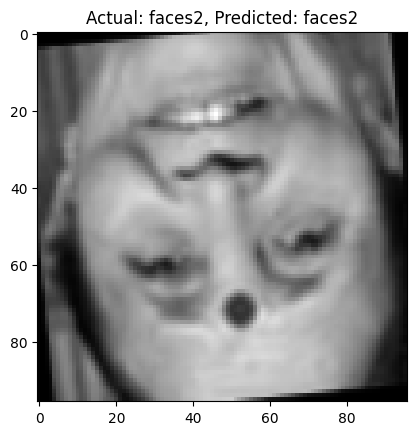

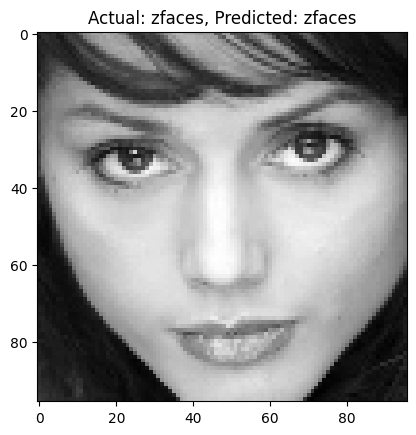

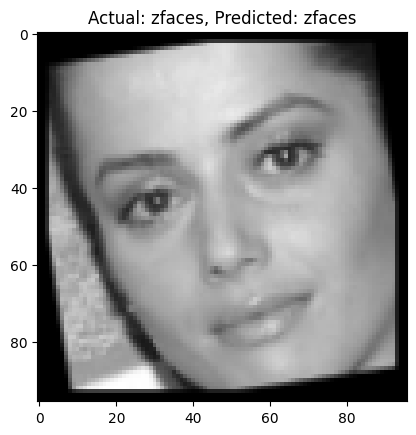

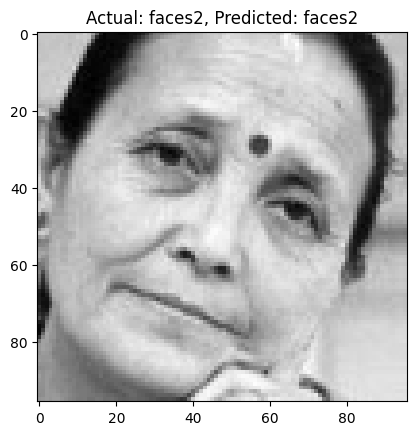

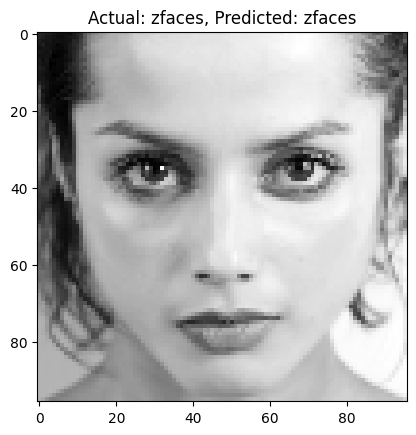

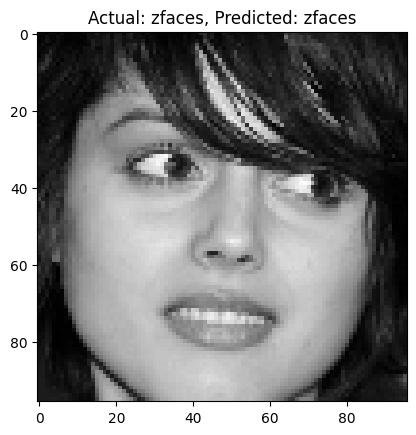

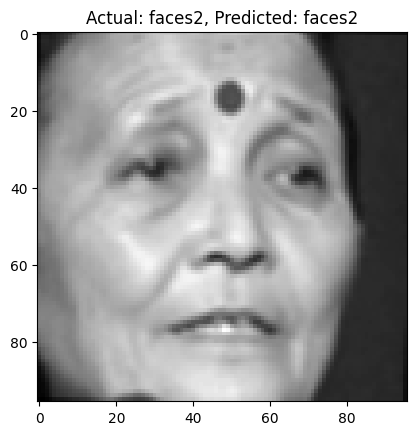

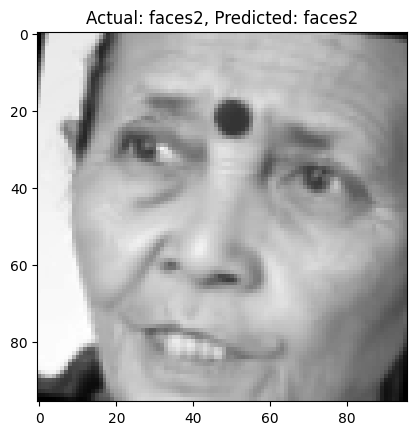

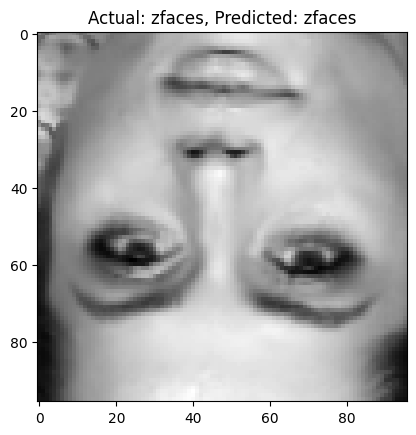

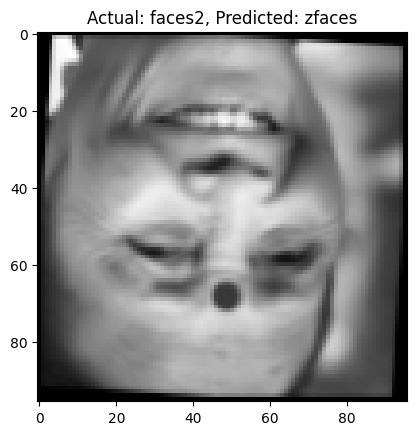

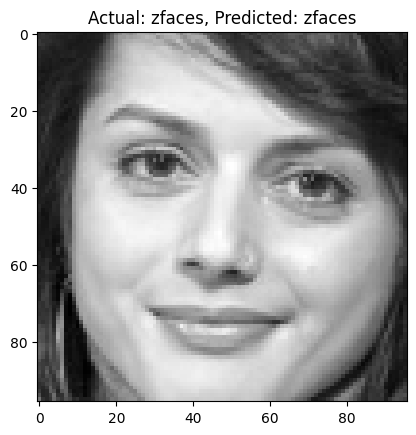

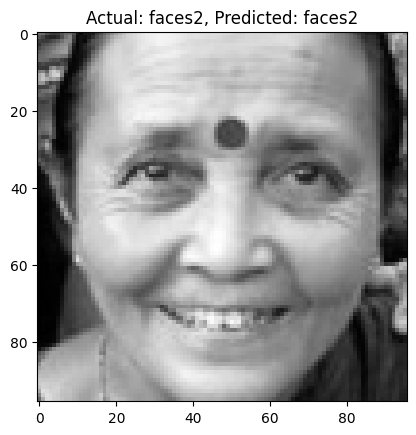

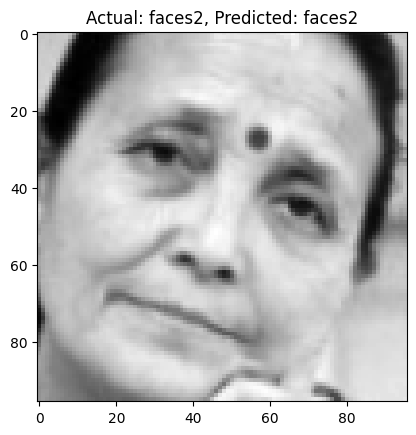

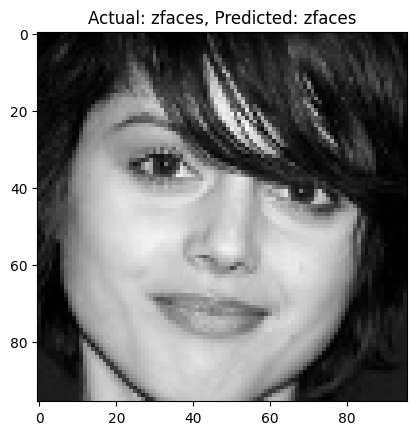

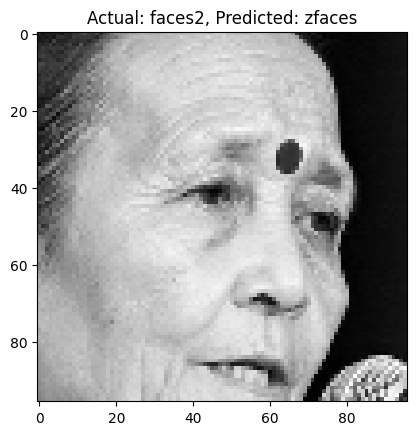

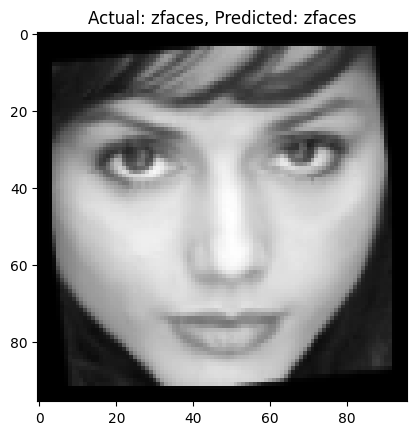

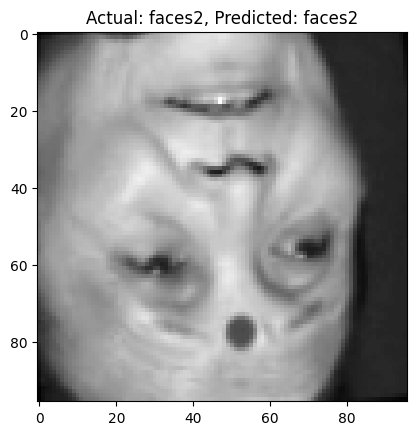

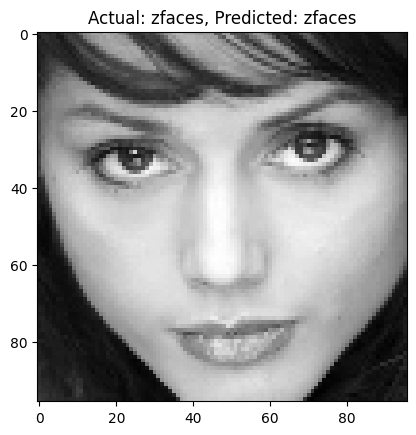

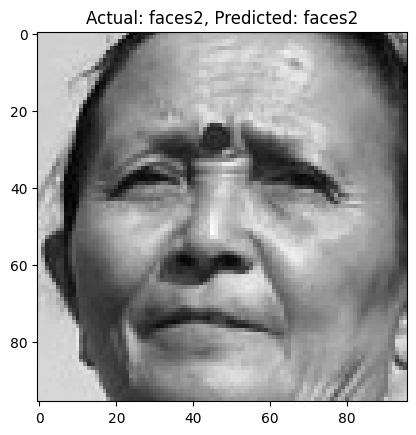

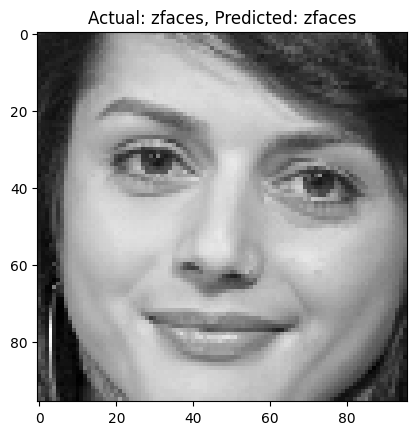

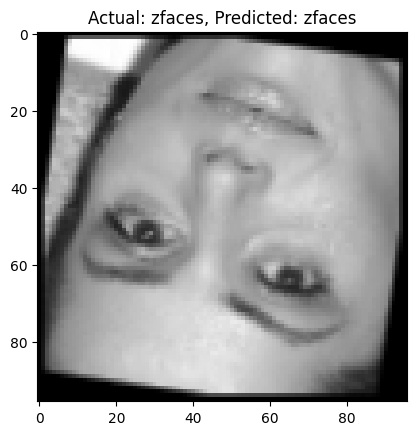

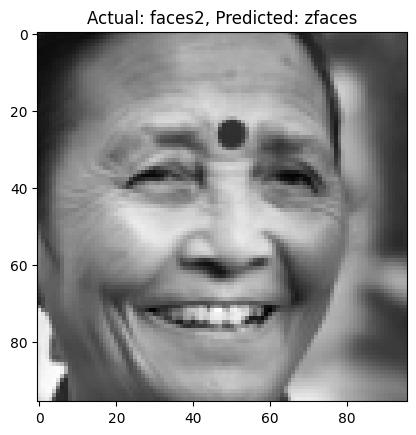

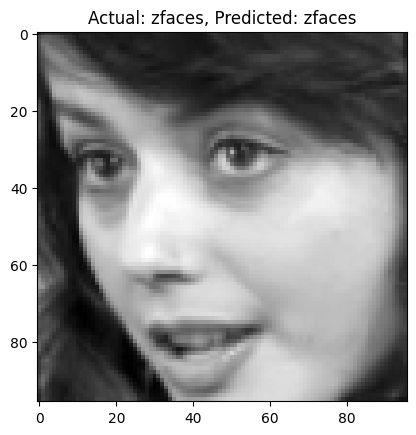

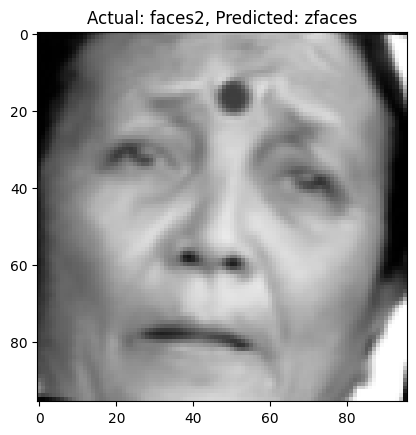

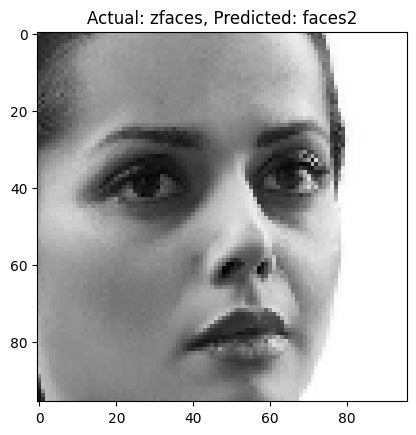

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(len(x_test)):
    img = x_test[i].reshape(96, 96)
    # plt.imshow(img, cmap='jet')
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")

    plt.show()


In [ ]:
resized_faces_dir = 'nishant_facesdata'
if not os.path.exists(resized_faces_dir):
    os.makedirs(resized_faces_dir)

In [4]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.7 MB/s eta 0:00:00


In [5]:
from mtcnn import MTCNN

In [6]:
detector = MTCNN()

In [7]:
from google.colab.patches import cv2_imshow

2/2 [==============================] - 0s 72ms/step


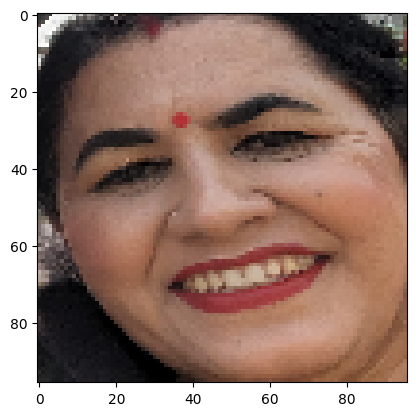

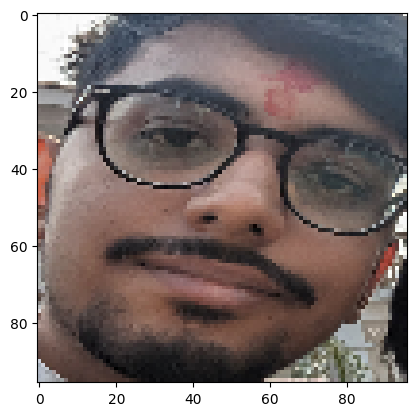

In [ ]:
img = cv2.imread('/content/nishantfaces/PXL_20240131_053217648.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect faces using MTCNN
faces = detector.detect_faces(rgb_img)

# Draw rectangles around detected faces and crop and resize them
for i,face in enumerate(faces):
    x, y, w, h = face['box']

    # Draw rectangle on the original image
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Crop and resize the face region
    cropped_face = img[y:y+h, x:x+w]
    resized_face = cv2.resize(cropped_face, (96, 96))

    bgr_resized_face = cv2.cvtColor(resized_face, cv2.COLOR_RGB2BGR)

    # Display the resized face using cv2.imshow()
    plt.imshow( bgr_resized_face)
    plt.show()


In [ ]:
import glob

In [ ]:
resized_faces_dir = 'nishant_faceimagefinallllrgb'
if not os.path.exists(resized_faces_dir):
    os.makedirs(resized_faces_dir)

In [ ]:
dataset_dirs = ['/content/nishantfaces']

for index,file in enumerate(glob.glob("/content/nishantfaces/*")):
        img = cv2.imread(file)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(rgb_img)

        for i,face in enumerate(faces):
            x, y, w, h = face['box']
            # Crop and resize the face region
            cropped_face = img[y:y+h, x:x+w]
            resized_face = cv2.resize(cropped_face, (96, 96))
            resized_face_path = os.path.join(resized_faces_dir, f"{index}_{i}_{img_name}")
            cv2.imwrite(resized_face_path, resized_face)


3/3 [==============================] - 0s 42ms/step


In [ ]:
!zip -r /content/file.zip /content/nishant_faceimagefinallllrgb

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import os

In [15]:
dataset_dirs = ['/content/NishantDad', '/content/Nishant']
features = []
labels = []

for i, dataset in enumerate(dataset_dirs):
  for root, dirs, _ in os.walk(dataset):
    category = root.split("/")[-1]
    for img_name in os.listdir(root):
        img = cv2.imread(os.path.join(root, img_name))
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features.append(gray_img.flatten())
        labels.append(category)

features = np.array(features)
labels = np.array(labels)

In [16]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
  iaa.Flipud(0.5),
  iaa.Affine(rotate=(10,-10)),
  iaa.Affine(scale=(0.9, 1.1))
])

In [17]:
aug_data = []
aug_labels = []
for i in range(len(features)):
    img = features[i].reshape(96, 96)
    img = seq(images=img)
    img = img.reshape(-1)
    aug_data.append(img)
    aug_labels.append(labels[i])


In [18]:
import matplotlib.pyplot as plt

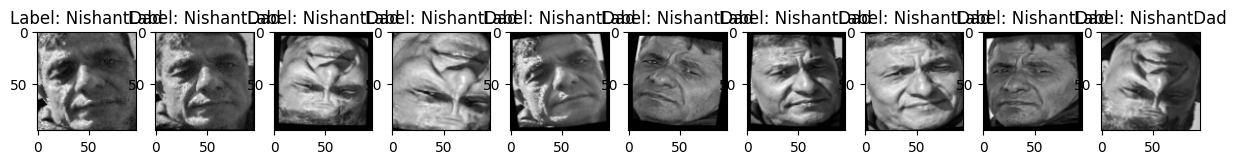

In [19]:
n = 10

# Plot augmented images
plt.figure(figsize=(15, 3))
for i in range(n):
    plt.subplot(1, n, i + 1)
    img = aug_data[i].reshape(96, 96)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {labels[i]}")
plt.show()

In [20]:
# Add augmented data to original dataset
features = np.concatenate((features, np.array(aug_data)), axis=0)
labels = np.concatenate((labels, np.array(aug_labels)), axis=0)

In [21]:
x_train, x_test , y_train, y_test =  train_test_split(features, labels, test_size = 0.2, random_state=42)

In [29]:
params={
    'C':[0.1,1,10,100], #hyperparamater to control error lower the C higher the sense of overfitting
    'gamma':[1,0.1,0.01,0.01], # Only required for RBF. For linear only C is enough. Gamma defines curvatures
    'kernel':['rbf','linear']

}
gridsearch=GridSearchCV(
    SVC(probability = True),
    params,
    verbose=3, #Progress bar showing
    cv=5, #cross validation
    n_jobs=2, #cores to assign
)
model=gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [30]:
print("Best parameters:", model.best_params_)
print("Best score:", model.best_score_)

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best score: 0.9525641025641025


In [33]:
best_model= SVC(probability= True, C=0.1,gamma=1,kernel = 'linear')
best_model.fit(x_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear', probability=True)

In [23]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred = model.predict(x_test)
confidence_scores = model.predict_proba(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confidence:", confidence_scores)

Accuracy: 0.8125
Confidence: [[0.94284403 0.05715597]
 [0.05460501 0.94539499]
 [0.99072002 0.00927998]
 [0.97333927 0.02666073]
 [0.84028265 0.15971735]
 [0.92690907 0.07309093]
 [0.99699545 0.00300455]
 [0.11414944 0.88585056]
 [0.85135919 0.14864081]
 [0.95586983 0.04413017]
 [0.77571018 0.22428982]
 [0.91356777 0.08643223]
 [0.94852497 0.05147503]
 [0.99576911 0.00423089]
 [0.89969023 0.10030977]
 [0.53817359 0.46182641]]


In [25]:
print("Best parameters:", model.best_params_)
print("Best score:", model.best_score_)

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best score: 0.9525641025641025


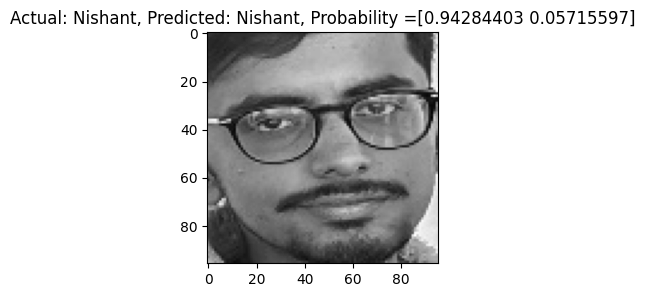

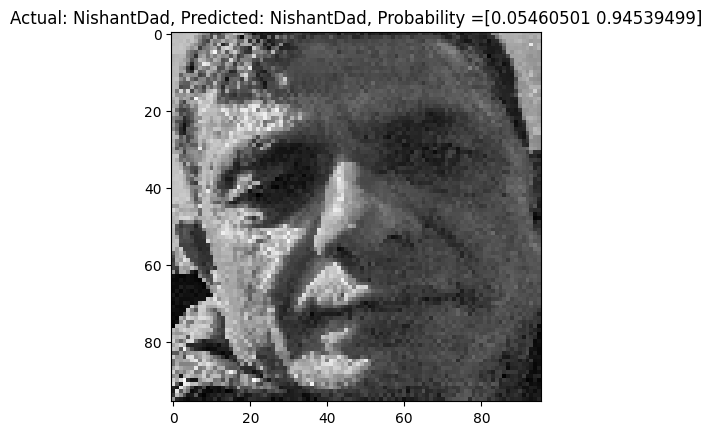

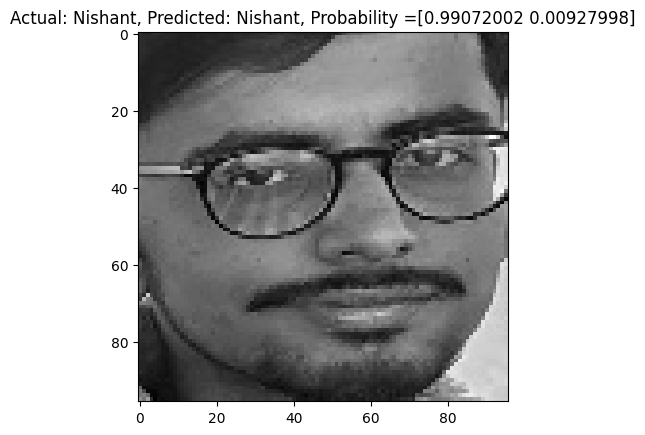

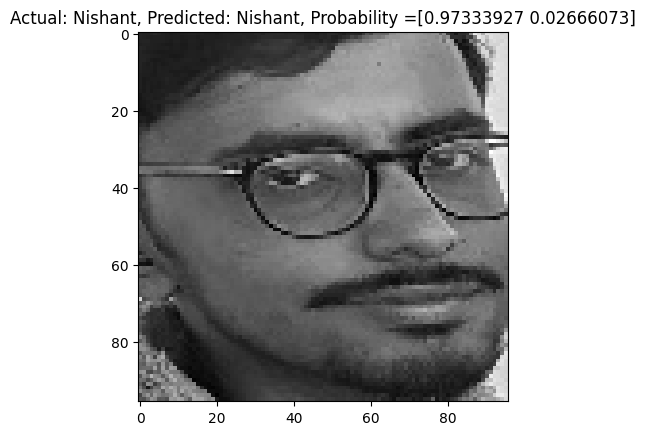

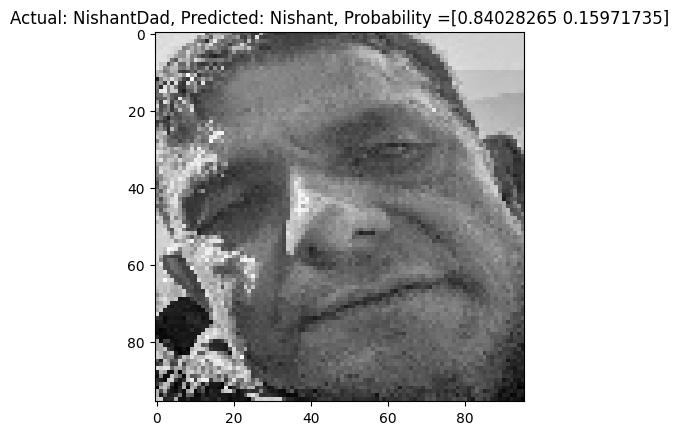

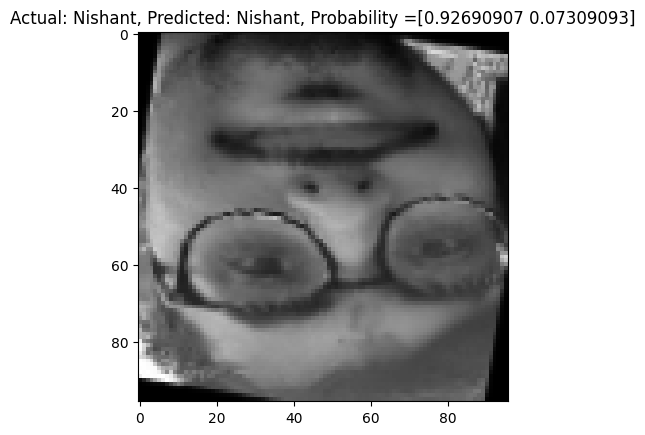

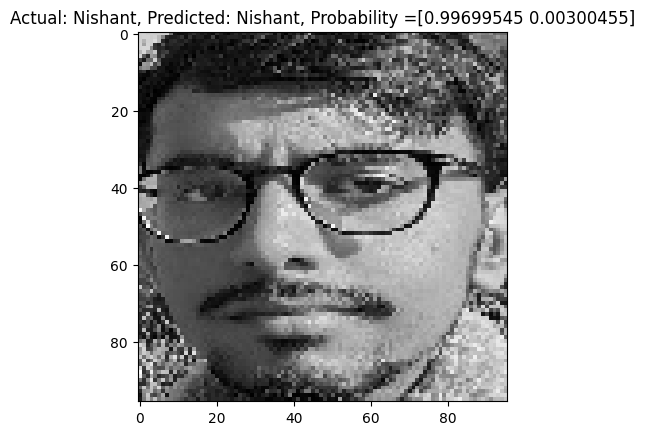

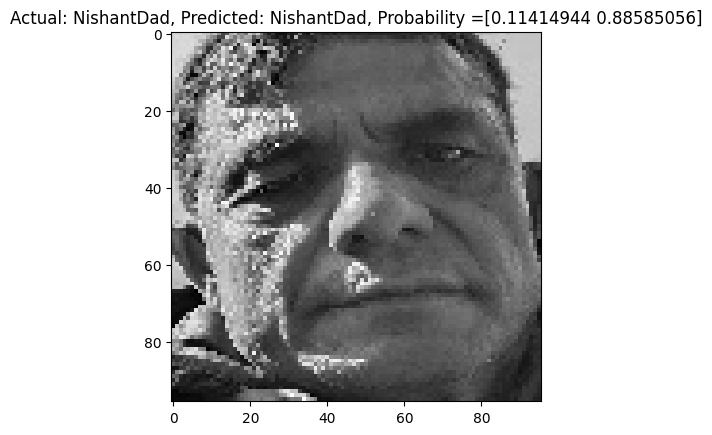

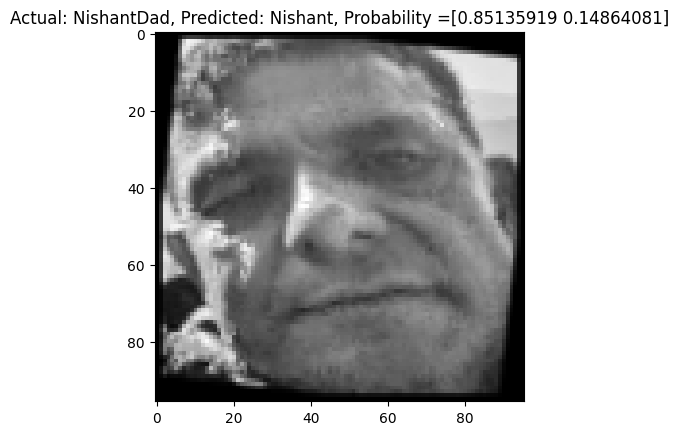

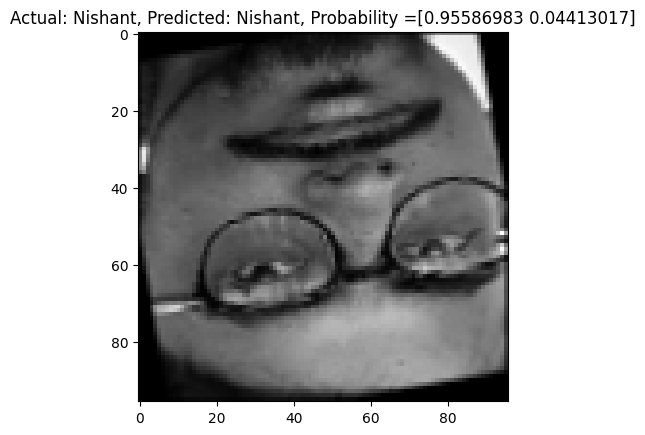

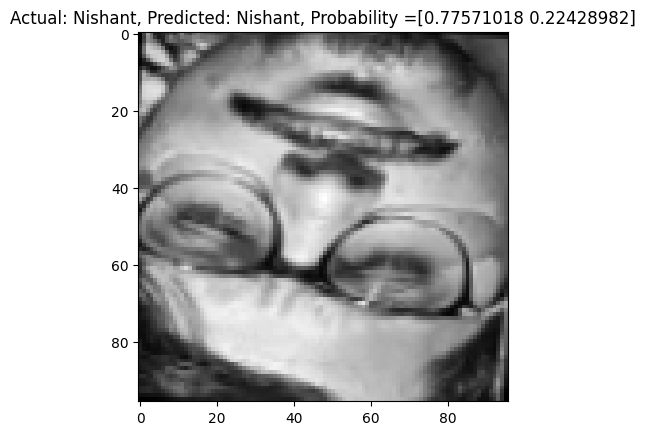

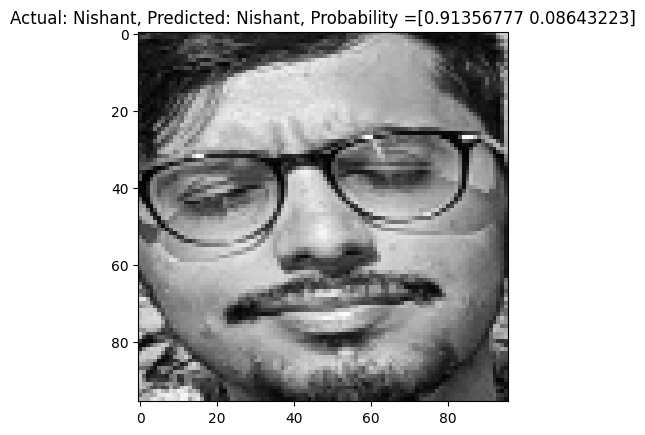

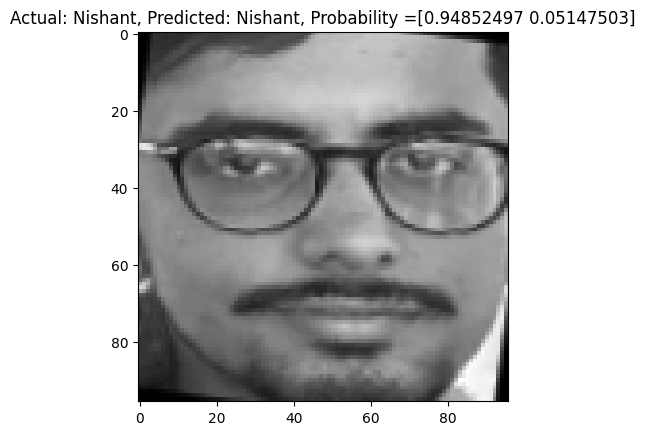

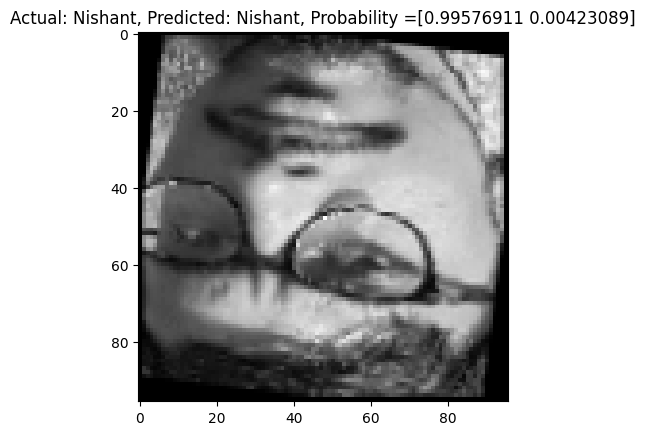

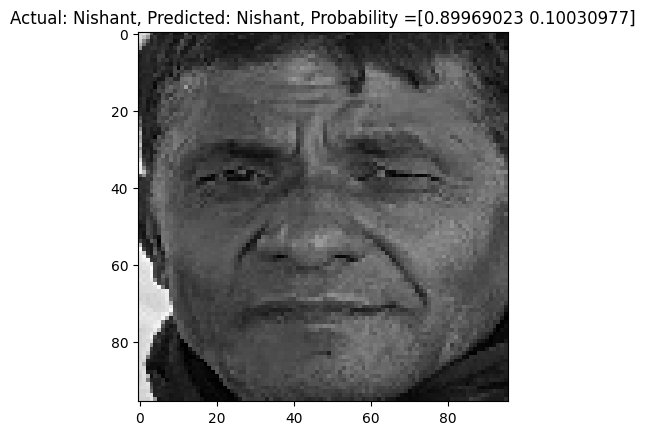

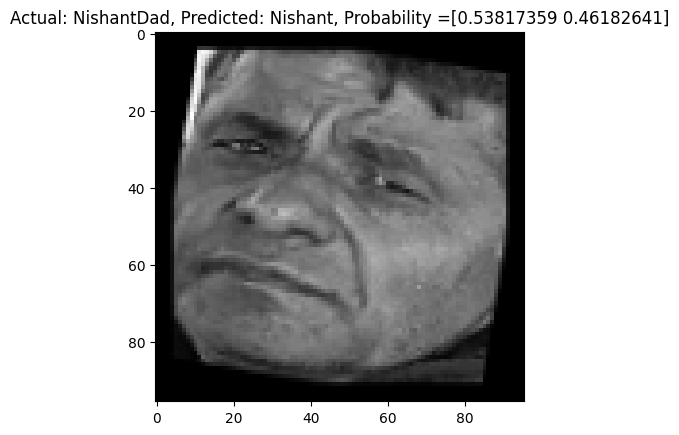

In [35]:
plt.figure(figsize=(15, 3))
for i in range(len(x_test)):
    img = x_test[i].reshape(96, 96)
    # plt.imshow(img, cmap='jet')
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}, Probability ={confidence_scores[i]}")

    plt.show()

In [49]:
def detect_face(image):
  features = []
  img = image
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  faces = detector.detect_faces(rgb_img)
  for i,face in enumerate(faces):
      x, y, w, h = face['box']
      # Crop and resize the face region
      cropped_face = img[y:y+h, x:x+w]
      resized_face = cv2.resize(cropped_face, (96, 96))gr
      ay_img = cv2.cvtColor(resized_face, cv2.COLOR_BGR2GRAY)
      plt.imshow(gray_img,cmap='gray')
      plt.show()
      features.append(gray_img.flatten())
  features= np.array(features)
  pred = model.predict(features)
  confidence_scores = model.predict_proba(features)
  return pred,confidence_scores

3/3 [==============================] - 0s 55ms/step


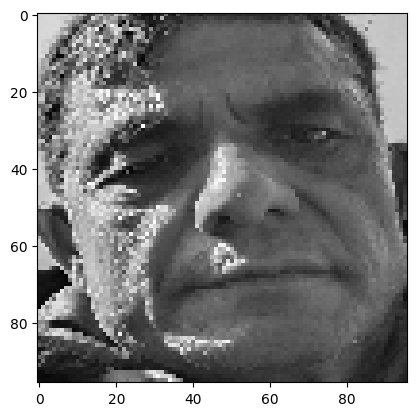

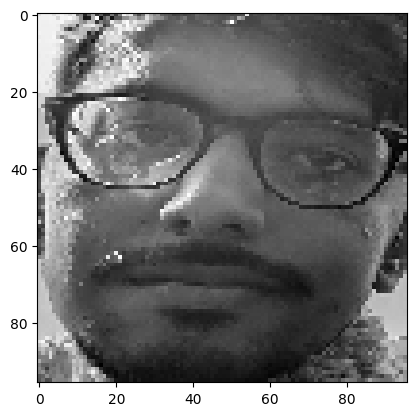

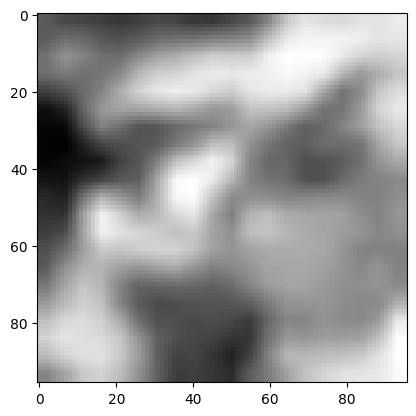

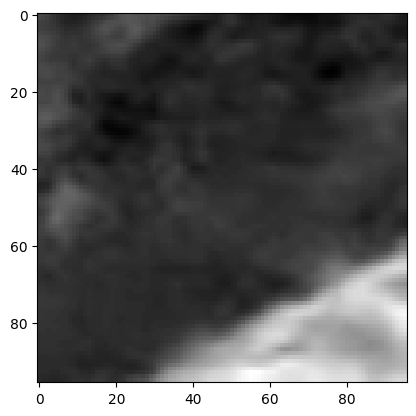

In [50]:
img = cv2.imread("/content/PXL_20240203_085135921.jpg")
pred,confidence_scores= detect_face(img)


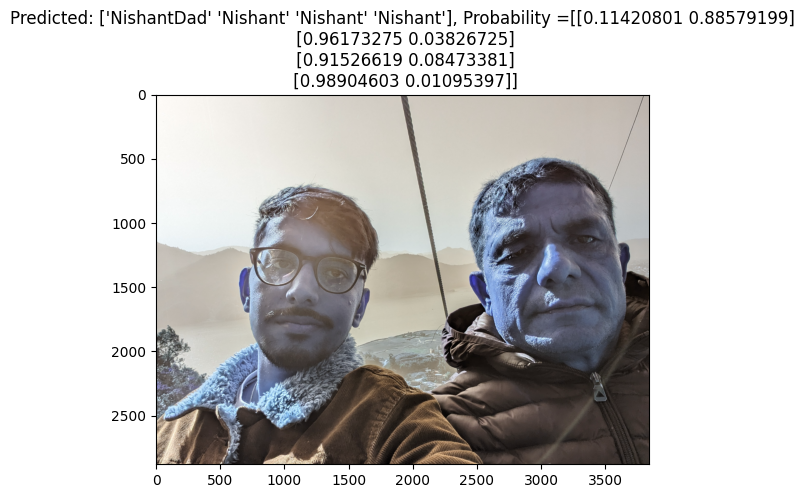

In [51]:
plt.imshow(img,cmap='gray')
plt.title(f"Predicted: {pred}, Probability ={confidence_scores}")
plt.show()

In [ ]:
import pickle

In [ ]:
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)